<a href="https://colab.research.google.com/github/bharat03rana/machine-learning/blob/main/Vehicle_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vehicle Price Prediction

In [561]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from xgboost import XGBRegressor

In [562]:
#dataset loading in dataframe
vehicle_data = pd.read_csv('/content/dataset.csv')

In [563]:
#getting information about the dataset
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [564]:
#first 5  rows of the dataset
vehicle_data.head()


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [565]:
vehicle_data.tail()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 Mercedes-Benz Sprinter 2500 Cargo 144 WB ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dealer Comments +++ Price Ends 5/31/2024 +++ A...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive
999,2024 Jeep Wagoneer Base,\n \n The ALL New Friendship CDJR ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n CVT with Xtronic, AWD.At Tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive
1001,2024 Chevrolet Silverado 2500 WT,01u 2024 Chevrolet Silverado 2500HD Work Truck...,Chevrolet,Silverado 2500,2024,48995.0,"8 gasoline direct injection, variable valve co...",8.0,Gasoline,31.0,Automatic,WT,Pickup Truck,4.0,Wheatland Yellow,Jet Black,Rear-wheel Drive


In [566]:
#statistical measures of dataset
vehicle_data.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [567]:
#checking shape of the dataset
vehicle_data.shape

(1002, 17)

In [568]:
#finding missing values in the dataset
vehicle_data.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,23
engine,2
cylinders,105
fuel,7
mileage,34


In [569]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

Handling missing values for:-
price
cylinders
mileage
doors

In [570]:

#handling missing values for price
vehicle_data['price'].mean()

np.float64(50202.98569969356)

In [571]:
#filling the missing values in price colunm with mean value
vehicle_data['price'] = vehicle_data['price'].fillna(vehicle_data['price'].mean())

In [572]:
#finding missing values after filling missing values in price
vehicle_data.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,0
engine,2
cylinders,105
fuel,7
mileage,34


In [573]:
#handling missing values for cylinders
vehicle_data['cylinders'].mean()

np.float64(4.975473801560758)

In [574]:
#filling the missing values in cylinders colunm with mean value
vehicle_data['cylinders'] = vehicle_data['cylinders'].fillna(vehicle_data['cylinders'].mean())

In [575]:
#finding missing values after filling missing values in cylinders
vehicle_data.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,0
engine,2
cylinders,0
fuel,7
mileage,34


In [576]:
#handling missing values for mileage
vehicle_data['mileage'].mean()

np.float64(69.03305785123968)

In [577]:
#filling the missing values in mileage colunm with mean value
vehicle_data['mileage'] = vehicle_data['mileage'].fillna(vehicle_data['mileage'].mean())

In [578]:
#finding missing values after filling missing values in mileage
vehicle_data.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,0
engine,2
cylinders,0
fuel,7
mileage,0


In [579]:
#handling missing values for mileage
vehicle_data['doors'].mean()

np.float64(3.943718592964824)

In [580]:
#filling the missing values in mileage colunm with mean value
vehicle_data['doors'] = vehicle_data['doors'].fillna(vehicle_data['doors'].mean())

In [581]:
#finding missing values after filling missing values in doors
vehicle_data.isnull().sum()

,0
name,0
description,56
make,0
model,0
year,0
price,0
engine,2
cylinders,0
fuel,7
mileage,0


replacing missing values with mode

In [582]:
#missing values replaced in discription with mode using pivot table
#the comparision for adding missing value is done based on any other colunm from dataset which represents the description precision values
mode_description = vehicle_data.pivot_table(values='description',columns='body',aggfunc=(lambda x:x.mode()[0]))
print(mode_description)

body                                                 Cargo Van  \
description  \n      \n        2024 Ram ProMaster 3500 Base...   

body                                               Convertible  \
description  Snowflake White Pearl Mica 2023 Mazda Miata RF...   

body                                                 Hatchback  \
description  \n      \n        .\n      \n    The Warren He...   

body                                                   Minivan  \
description  Fathom Blue Pearlcoat 2023 Chrysler Pacifica T...   

body                                             Passenger Van  \
description  3rd Row Seat,Keyless Start,Rear Spoiler,Black/...   

body                                              Pickup Truck  \
description  \n      \n        IN STOCK! CALL TO CONFRIM AV...   

body                                       SUV  \
description  \n      \n        .\n      \n       

body                                                     Sedan  
description  \n      \n        Fletc

In [583]:
missing_values_description=vehicle_data['description'].isnull()

In [584]:
print(missing_values_description)

0       False
1       False
2        True
3       False
4       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Name: description, Length: 1002, dtype: bool


In [603]:
vehicle_data.loc[missing_values_description,'description']=vehicle_data.loc[missing_values_description,'body'].apply(lambda x: mode_description.get(x, None).iloc[0] if mode_transmission.get(x,None) is not None else None)


In [520]:
#checking for missing values after description
vehicle_data.isnull().sum()


,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,2
cylinders,0
fuel,7
mileage,0


In [521]:
#missing values replaced in engine with mode using pivot table
#the comparision for adding missing value is done based on any other colunm from dataset which represents the engine's precision values
mode_engine = vehicle_data.pivot_table(values='engine',columns='fuel',aggfunc=(lambda x:x.mode()[0]))
print(mode_engine)

fuel                      Diesel Diesel (B20 capable)  \
engine  24V DDI OHV Turbo Diesel                  der   

fuel                 E85 Flex Fuel Electric            Gasoline  \
engine  24V PDI DOHC Flexible Fuel        c  16V GDI DOHC Turbo   

fuel                       Hybrid       PHEV Hybrid Fuel  
engine  16V GDI DOHC Turbo Hybrid  DOHC 16V LEV3-SULEV30  


In [522]:
missing_values_engine=vehicle_data['engine'].isnull()

In [523]:
print(missing_values_engine)

0       False
1       False
2       False
3       False
4       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Name: engine, Length: 1002, dtype: bool


In [602]:
vehicle_data.loc[missing_values_engine,'engine']=vehicle_data.loc[missing_values_engine,'fuel'].apply(lambda x:mode_engine.get(x,None).iloc[0] if mode_transmission.get(x,None) is not None else None)


In [525]:
#checking for missing values after engine
vehicle_data.isnull().sum()

,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,7
mileage,0


In [601]:
#missing values replaced in fuel with mode using pivot table
#the comparision for adding missing value is done based on any other colunm from dataset which represents the fuel's precision values
mode_fuel = vehicle_data.pivot_table(values='fuel',columns='mileage',aggfunc=(lambda x:x.mode()[0]))
print(mode_fuel)
missing_values_fuel=vehicle_data['fuel'].isnull()
print(missing_values_fuel)
vehicle_data.loc[missing_values_fuel,'fuel']=vehicle_data.loc[missing_values_fuel,'mileage'].apply(lambda x:mode_fuel.get(x,None).iloc[0] if mode_transmission.get(x,None) is not None else None)


mileage  0.0     1.0     2.0     3.0     4.0     5.0     6.0     7.0     \
fuel          4       4       4       4       4       4       4       4   

mileage  8.0     9.0     ...  2077.0  2500.0  3425.0  3838.0  4357.0  4440.0  \
fuel          4       4  ...       4       4       4       4       5       4   

mileage  4501.0  4723.0  5581.0  9711.0  
fuel          4       4       4       4  

[1 rows x 96 columns]
0       False
1       False
2       False
3       False
4       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Name: fuel, Length: 1002, dtype: bool


In [527]:
#checking missing values on fuel
vehicle_data.isnull().sum()

,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0


In [596]:
#missing values replaced in transmission with mode using pivot table
#the comparision for adding missing value is done based on any other colunm from dataset which represents the transmission's precision values
mode_transmission = vehicle_data.pivot_table(values='transmission',columns='body',aggfunc=(lambda x:x.mode()[0]))
print(mode_transmission)
missing_values_transmission=vehicle_data['transmission'].isnull()
print(missing_values_transmission)
vehicle_data.loc[missing_values_transmission,'transmission']=vehicle_data.loc[missing_values_transmission,'body'].apply(lambda x:mode_transmission.get(x,None).iloc[0] if mode_transmission.get(x,None) is not None else None)

body                  Cargo Van        Convertible          Hatchback  \
transmission  9-Speed Automatic  6-Speed Automatic  1-Speed Automatic   

body                          Minivan      Passenger Van Pickup Truck  \
transmission  9-Speed 948TE Automatic  9-Speed Automatic    Automatic   

body                        SUV              Sedan  
transmission  8-Speed Automatic  8-Speed Automatic  
0       False
1       False
2       False
3       False
4       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Name: transmission, Length: 1002, dtype: bool


In [529]:
#checking missing values on transmission
vehicle_data.isnull().sum()

,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0


In [590]:
#missing values replaced in trim with mode using pivot table
#the comparision for adding missing value is done based on any other colunm from dataset which represents the trim's precision values
mode_trim = vehicle_data.pivot_table(values='trim',columns='make',aggfunc=(lambda x:x.mode()[0]))
print(mode_trim)
missing_values_trim=vehicle_data['trim'].isnull()
print(missing_values_trim)
vehicle_data.loc[missing_values_trim,'trim']=vehicle_data.loc[missing_values_trim,'make'].apply(lambda x:mode_trim.get(x,None).iloc[0] if mode_transmission.get(x,None) is not None else None)

make Acura     Audi        BMW   Buick Cadillac Chevrolet   Chrysler    Dodge  \
trim  Base  Premium  xDrive40i  Avenir   Luxury        LT  Touring-L  Pursuit   

make Ford     GMC  ...                Lexus  Lincoln Mazda Mercedes-Benz  \
trim  XLT  Denali  ...  F SPORT PERFORMANCE  Reserve  Base   Base 4MATIC   

make Nissan        RAM   Subaru   Toyota Volkswagen  \
trim     SV  Tradesman  Premium  Limited    1.5T SE   

make                             Volvo  
trim  T8 Plus Bright Theme 7 Passenger  

[1 rows x 28 columns]
0       False
1       False
2       False
3       False
4       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Name: trim, Length: 1002, dtype: bool


In [531]:
#checking missing values on trim
vehicle_data.isnull().sum()

,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0


In [591]:
#missing values replaced in body with mode using pivot table
#the comparision for adding missing value is done based on any other colunm from dataset which represents the body's precision values
mode_body = vehicle_data.pivot_table(values='body',columns='doors',aggfunc=(lambda x:x.mode()[0]))
print(mode_body)
missing_values_body=vehicle_data['body'].isnull()
print(missing_values_body)
vehicle_data.loc[missing_values_body,'body']=vehicle_data.loc[missing_values_body,'doors'].apply(lambda x:mode_body.get(x,None).iloc[0] if mode_transmission.get(x,None) is not None else None)

doors      2.000000   3.000000 3.943719 4.000000 5.000000
body   Pickup Truck  Cargo Van      SUV      SUV      SUV
0       False
1       False
2       False
3       False
4       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Name: body, Length: 1002, dtype: bool


In [533]:

#checking missing values on body
vehicle_data.isnull().sum()

,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0


In [600]:
#missing values replaced in exteriorcolor with mode using pivot table
#the comparision for adding missing value is done based on any other colunm from dataset which represents the exterior_color's precision values
mode_exterior_color = vehicle_data.pivot_table(values='exterior_color',columns='make',aggfunc=(lambda x:x.mode()[0]))
print(mode_exterior_color)
missing_values_exterior_color=vehicle_data['exterior_color'].isnull()
print(missing_values_exterior_color)
vehicle_data.loc[missing_values_exterior_color,'exterior_color']=vehicle_data.loc[missing_values_exterior_color,'make'].apply(lambda x:mode_exterior_color.get(x,None).iloc[0] if mode_transmission.get(x,None) is not None else None)


make           Acura                    Audi                      BMW  \
exterior_color  Gray  Glacier White Metallic  Black Sapphire Metallic   

make                          Buick                Cadillac     Chevrolet  \
exterior_color  Ocean Blue Metallic  Crystal White Tri-Coat  Summit White   

make                          Chrysler                       Dodge  \
exterior_color  Bright White Clearcoat  DB Black Crystal Clearcoat   

make                    Ford           GMC  ...   Lexus        Lincoln  \
exterior_color  Oxford White  Summit White  ...  Caviar  Gray Metallic   

make                             Mazda Mercedes-Benz        Nissan  \
exterior_color  Deep Crystal Blue Mica   Polar White  Gun Metallic   

make                               RAM               Subaru     Toyota  \
exterior_color  Bright White Clearcoat  Crystal White Pearl  CELESTITE   

make            Volkswagen   Volvo  
exterior_color  Pure White  Bright  

[1 rows x 28 columns]
0       False
1      

In [535]:
#checking missing values on exterior color
vehicle_data.isnull().sum()

,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0


In [599]:
#missing values replaced in exteriorcolor with mode using pivot table
#the comparision for adding missing value is done based on any other colunm from dataset which represents the exterior_color's precision values
mode_interior_color = vehicle_data.pivot_table(values='interior_color',columns='doors',aggfunc=(lambda x:x.mode()[0]))
print(mode_interior_color)
missing_values_interior_color=vehicle_data['interior_color'].isnull()
print(missing_values_interior_color)
vehicle_data.loc[missing_values_interior_color,'interior_color']=vehicle_data.loc[missing_values_interior_color,'doors'].apply(lambda x:mode_interior_color.get(x,None).iloc[0] if mode_transmission.get(x,None) is not None else None)


doors          2.000000 3.000000 3.943719 4.000000 5.000000
interior_color    Black    Black    Black    Black    Ebony
0       False
1       False
2       False
3       False
4       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Name: interior_color, Length: 1002, dtype: bool


In [537]:
#checking missing values
vehicle_data.isnull().sum()

,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0


In [598]:
#missing values replaced in year with mode using pivot table
#the comparision for adding missing value is done based on any other colunm from dataset which represents the year's precision values
mode_year = vehicle_data.pivot_table(values='year',columns='doors',aggfunc=(lambda x:x.mode()[0]))
print(mode_year)
missing_values_year=vehicle_data['year'].isnull()
print(missing_values_year)
vehicle_data.loc[missing_values_year,'year']=vehicle_data.loc[missing_values_year,'doors'].apply(lambda x:mode_year.get(x,None).iloc[0] if mode_transmission.get(x,None) is not None else None)


doors  2.000000  3.000000  3.943719  4.000000  5.000000
year       2024      2024      2024      2024      2024
0       False
1       False
2       False
3       False
4       False
        ...  
997     False
998     False
999     False
1000    False
1001    False
Name: year, Length: 1002, dtype: bool


In [539]:
#checking missing values
vehicle_data.isnull().sum()

,0
name,0
description,0
make,0
model,0
year,0
price,0
engine,0
cylinders,0
fuel,0
mileage,0


In [540]:
#first five rows
vehicle_data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,body ...,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


numerical data visualization

<ipython-input-541-02e4e5af741e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicle_data['year'])


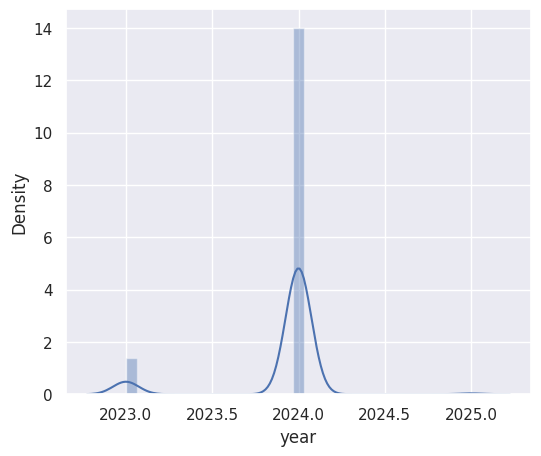

In [541]:
sns.set()
#year distribution
plt.figure(figsize=(6,5))
sns.distplot(vehicle_data['year'])
plt.show()

<ipython-input-542-982aeed396ae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicle_data['price'])


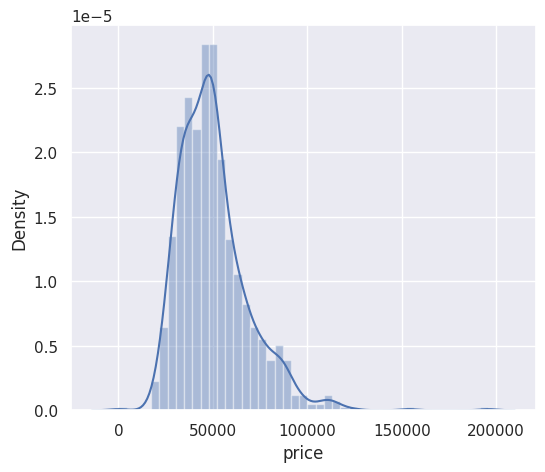

In [542]:
#price distribution
plt.figure(figsize=(6,5))
sns.distplot(vehicle_data['price'])
plt.show()

<ipython-input-543-82a18dc34938>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicle_data['cylinders'])


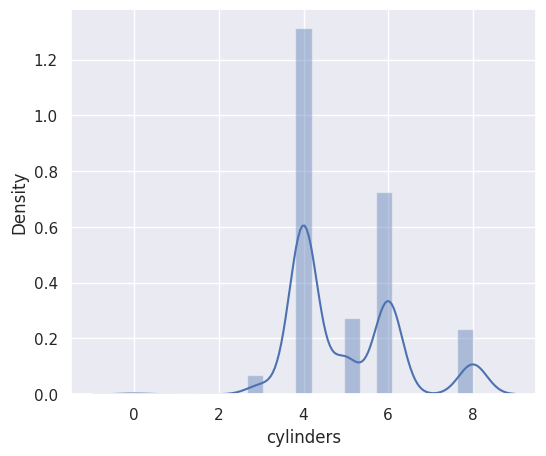

In [543]:
#cylinders distribution
plt.figure(figsize=(6,5))
sns.distplot(vehicle_data['cylinders'])
plt.show()

<ipython-input-545-d490875c7487>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(vehicle_data['doors'])


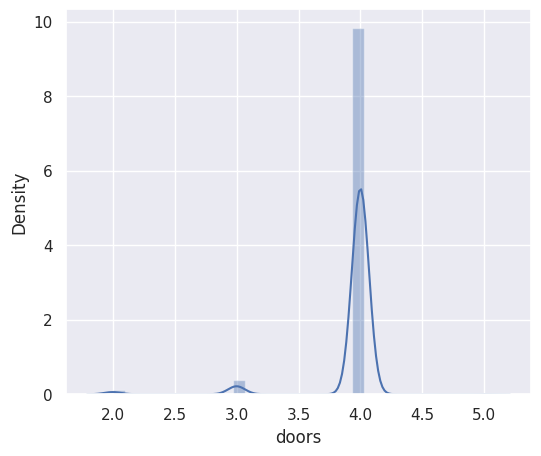

In [545]:
#doors distribution
plt.figure(figsize=(6,5))
sns.distplot(vehicle_data['doors'])
plt.show()

In [549]:
vehicle_data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,body ...,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [552]:
#label encoding
encoder = LabelEncoder()
#encoding on make colunm
vehicle_data['make'] = encoder.fit_transform(vehicle_data['make'])


In [553]:
#encoding on model colunm try to do for all colunms
vehicle_data['model'] = encoder.fit_transform(vehicle_data['model'])


In [595]:
vehicle_data['fuel'] = encoder.fit_transform(vehicle_data['fuel']) #usee mode missing value method


In [597]:
vehicle_data['transmission'] = encoder.fit_transform(vehicle_data['transmission']) # same


In [604]:
vehicle_data['body'] = encoder.fit_transform(vehicle_data['body'])


In [605]:
vehicle_data['description'] = encoder.fit_transform(vehicle_data['description'])


In [606]:
vehicle_data['trim'] = encoder.fit_transform(vehicle_data['trim'])


In [607]:
vehicle_data['exterior_color'] = encoder.fit_transform(vehicle_data['exterior_color'])


In [608]:
vehicle_data['interior_color'] = encoder.fit_transform(vehicle_data['interior_color'])

In [610]:
vehicle_data['model'] = encoder.fit_transform(vehicle_data['model'])

In [611]:
vehicle_data['engine'] = encoder.fit_transform(vehicle_data['engine'])

In [612]:
vehicle_data['drivetrain']=encoder.fit_transform(vehicle_data['drivetrain'])

In [614]:
vehicle_data['make'] = encoder.fit_transform(vehicle_data['make'])

In [615]:
vehicle_data.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,238,15,139,2024,74600.0,23,6.0,4,10.0,19,148,6,4.0,257,35,1
1,2024 Jeep Grand Cherokee Laredo,577,15,56,2024,50170.0,66,6.0,4,1.0,19,83,6,4.0,144,35,1
2,2024 GMC Yukon XL Denali,27,9,148,2024,96410.0,48,8.0,4,0.0,32,50,6,4.0,236,82,1
3,2023 Dodge Durango Pursuit,750,7,29,2023,46835.0,13,8.0,4,32.0,19,110,6,4.0,259,5,0
4,2024 RAM 3500 Laramie,68,23,2,2024,81663.0,19,6.0,0,10.0,9,80,5,4.0,207,5,1


In [616]:
#splitting features and target
X=vehicle_data.drop(columns=['price','name'],axis=1)
Y=vehicle_data['price']

In [617]:
print(X)


      description  make  model  year  engine  cylinders  fuel  mileage  \
0             238    15    139  2024      23        6.0     4     10.0   
1             577    15     56  2024      66        6.0     4      1.0   
2              27     9    148  2024      48        8.0     4      0.0   
3             750     7     29  2023      13        8.0     4     32.0   
4              68    23      2  2024      19        6.0     0     10.0   
...           ...   ...    ...   ...     ...        ...   ...      ...   
997           561    21    122  2024       5        4.0     0     10.0   
998           623     7     61  2024      36        4.0     4      0.0   
999           415    15    139  2024      23        6.0     4     20.0   
1000          145    22     76  2024      43        6.0     4      6.0   
1001          527     5    113  2024      51        8.0     4     31.0   

      transmission  trim  body  doors  exterior_color  interior_color  \
0               19   148     6    4.0 

In [618]:
print(Y)

0       74600.0
1       50170.0
2       96410.0
3       46835.0
4       81663.0
         ...   
997     59037.0
998     49720.0
999     69085.0
1000    43495.0
1001    48995.0
Name: price, Length: 1002, dtype: float64


In [619]:
#splitting data into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(1002, 15) (801, 15) (201, 15)


model training using XGbooster regressor

In [621]:
#XGbooster
model=XGBRegressor()
model=model.fit(X_train,Y_train)

In [622]:
#evaluation
training_data_prediction=model.predict(X_train)


In [623]:
#R2 value
r2_train=metrics.r2_score(Y_train,training_data_prediction)
print('R2 value for training data:',r2_train)

R2 value for training data: 0.9990728652212355


In [624]:
#prediction on text dataset
test_data_prediction=model.predict(X_test)
#r2 value
r2_test=metrics.r2_score(Y_test,test_data_prediction)
print('R2 value for test data:',r2_test)

R2 value for test data: 0.8685631847512281
